In [1]:
import pandas as pd
import requests

url = 'https://newscounts.appspot.com/api/response_rates/tract?FORMAT=JSON&DATA=CRRALL,DRRALL&STATE=NY'
'https://newscounts.appspot.com/api/response_rates/tract?FORMAT=CSV&DATA=CRRALL,DRRALL&STATE=NY'
JSONContent = requests.get(url).json()
temp = pd.DataFrame(JSONContent)
data = pd.DataFrame(columns = temp.columns)

states = ['AL','AZ','AR','CA','CO','CT','DE','DC','FL','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',\
          'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX',\
          'UT','VT','VA','WA','WV','WI','WY','AK','HI']

for state in states:
    print(state)
    url = 'https://newscounts.appspot.com/api/response_rates/tract?FORMAT=JSON&DATA=CRRALL,DRRALL&STATE=' + state
    try:
        JSONContent = requests.get(url).json()
        new = pd.DataFrame(JSONContent)
        data = pd.concat([data,new])
    except:
        pass

AL
AZ
AR
CA
CO
CT
DE
DC
FL
GA
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WV
WI
WY
AK
HI


In [3]:
data.to_csv('tract_daily_responses.csv')

In [13]:
data

,CRRALL,DRRALL,GEO_ID,RESP_DATE,county,county_name,state,state_name,state_short,tract
0,0.0,0.0,1400000US04001942600,2020-04-01,001,Apache,4,Arizona,AZ,942600
1,0.0,0.0,1400000US04001942700,2020-04-01,001,Apache,4,Arizona,AZ,942700
2,0.2,0.1,1400000US04001944000,2020-04-01,001,Apache,4,Arizona,AZ,944000
3,0.0,0.0,1400000US04001944100,2020-04-01,001,Apache,4,Arizona,AZ,944100
4,0.1,0.0,1400000US04001944201,2020-04-01,001,Apache,4,Arizona,AZ,944201
...,...,...,...,...,...,...,...,...,...,...
5481,0.1,0.0,1400000US15009031601,2020-03-20,009,Maui,15,Hawaii,HI,031601
5482,0.3,0.0,1400000US15009031700,2020-03-20,009,Maui,15,Hawaii,HI,031700
5483,0.2,0.0,1400000US15009031801,2020-03-20,009,Maui,15,Hawaii,HI,031801
5484,11.5,2.0,1400000US15009031900,2020-03-20,009,Maui,15,Hawaii,HI,031900


In [14]:
from PIL import Image
from io import BytesIO
import IPython

states = sorted(list(set(data.state_short)))
for state in states:

        tracts = set(data[data.state_short == state].tract)
        string = ''
        for county in counties:
            string = string + county + ','
        string = string[:-1]
        url = 'https://newscounts.appspot.com/api/response_rates/county?FORMAT=PNG&DATA=RRALL&STATE=' + state + '&COUNTY=' + string
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        print('\n\n\n****\n','Displaying State: ',state,'\n****\n\n\n')
        IPython.display.Image(img)


SyntaxError: unexpected EOF while parsing (<ipython-input-14-3bf2083e80e9>, line 17)

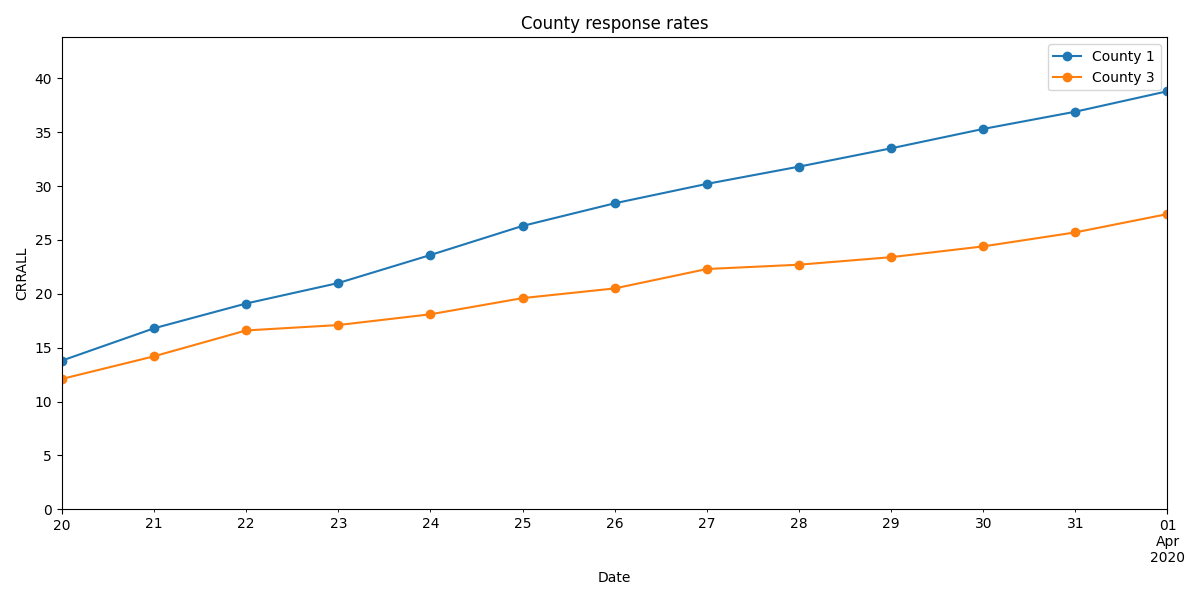

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

IPython.display.Image('https://newscounts.appspot.com/api/response_rates/county?FORMAT=PNG&DATA=CRRALL&STATE=NY&COUNTY=1,3',format='png')
IPython.display.Image('https://newscounts.appspot.com/api/response_rates/county?FORMAT=PNG&DATA=CRRALL&STATE=NY&COUNTY=1,3',format='png')